# Chess Games Performance

This dataset was built from chess games played on Lichess, a popular online platform. To keep the data manageable, it is composed of games from two specific months: January 2024 and May 2017. To ensure a representative sample, a randomly selected sample of the games from each month was selected. Specifically, the dataset includes 1.5% of the games from January 2024 and 7% of the games from May 2017.

Firstly, I am going to import the libriaries I want to use. These pre-written code will help me visualize and analyze data.

In [1]:
#Import libraries to be used
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plot
from datetime import datetime
import statistics
from scipy import stats
import math
from collections import Counter
import matplotlib.cm as plotcm

We read the data into a variable and specify that a comma seperates the data elements.

In [2]:
chessdata = pd.read_csv("games_data.csv", delimiter=',', header=0)

We then convert it to a dataframe - it's like a built in spreadsheet table. It will help me see the data in a table format.

In [3]:
chess = pd.DataFrame(chessdata)

Let's see the first 5 rows of the data in the table.

In [4]:
chess.head()

,GameID,Event,Round,Site,Date,Time,White,WhiteElo,WhiteRatingDiff,White_is_deleted,...,Black_playTime_total,Black_count_all,Black_title,Moves,TotalMoves,ECO,Opening,TimeControl,Termination,Result
0,1,Rated Blitz game,-,https://lichess.org/FTXRGHsh,2024.01.01,00:00:08,EyalSa,1550,-6.0,False,...,1410838.0,2700.0,NaN,1. d4 { [%eval 0.13] [%clk 0:05:00] } 1... d5 ...,54,D06,Queen's Gambit Declined: Marshall Defense,300+3,Time forfeit,0-1
1,2,Rated Bullet game,-,https://lichess.org/WlpQqus4,2024.01.01,00:00:18,Frogman33,1082,9.0,False,...,2091417.0,4924.0,NaN,1. d4 { [%eval 0.13] [%clk 0:02:00] } 1... d5 ...,63,D00,Queen's Pawn Game,120+1,Time forfeit,1-0
2,3,Rated Blitz game,-,https://lichess.org/HzbO1wkJ,2024.01.01,00:00:34,Tomi_Viper,1593,-5.0,False,...,1424148.0,4085.0,NaN,1. e4 { [%eval 0.2] [%clk 0:05:00] } 1... c6 {...,52,B10,Caro-Kann Defense,300+3,Time forfeit,0-1
3,4,Rated Rapid game,-,https://lichess.org/hjgvXMvo,2024.01.01,00:01:26,pony14,2289,-5.0,False,...,1195075.0,1772.0,NaN,1. Nf3 { [%eval 0.2] [%clk 0:10:00] } 1... Nf6...,128,D78,"Neo-Grünfeld Defense: Classical Variation, Ori...",600+0,Normal,0-1
4,5,Rated Rapid game,-,https://lichess.org/VtuIOQzk,2024.01.01,00:02:20,Niccosan,1205,6.0,False,...,332692.0,576.0,NaN,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... d5?!...,65,B01,Scandinavian Defense: Mieses-Kotroc Variation,600+0,Normal,1-0


Let's see how much data we're working with

In [5]:
chess.shape
print("We are working with", chess.shape[0], "chess games")

We are working with 130922 chess games


Let's see if there are any missing data values

In [6]:
#filter for data that has null values in any column
has_null_values = chess.isnull().any()
print(has_null_values)

GameID                  False
Event                   False
Round                   False
Site                    False
Date                    False
Time                    False
White                   False
WhiteElo                False
WhiteRatingDiff          True
White_is_deleted        False
White_tosViolation       True
White_profile_flag       True
White_createdAt          True
White_playTime_total     True
White_count_all          True
White_title              True
Black                   False
BlackElo                False
BlackRatingDiff          True
Black_is_deleted        False
Black_tosViolation       True
Black_profile_flag       True
Black_createdAt          True
Black_playTime_total     True
Black_count_all          True
Black_title              True
Moves                   False
TotalMoves              False
ECO                     False
Opening                 False
TimeControl             False
Termination             False
Result                  False
dtype: boo

Looking at the data, there are a few problems:

= There are missing values in these columns:
* WhiteRatingDiff
* White_tosViolation
* White_profile_flag
* White_createdAt
* White_playTime_total
* White_count_all
* White_title
* BlackRatingDiff
* Black_tosViolation
* Black_profile_flag
* Black_createdAt
* Black_playTime_total
* Black_count_all
* Black_title

= The date of chess games are in the incorrect format

= The creation date of both players accounts are in the incorrect format

We first need to see what NULL means for these columns:
* WhiteRatingDiff - There is no change in Elo rating for the white player resulting from the game.
* White_tosViolation - The white player has not violated terms of service.
* White_profile_flag - There is no flag on the white player's profile.
* White_createdAt - The creation date of the white player's account is missing.
* White_playTime_total - The total playtime(seconds) of the white player on the platform is missing.
* White_count_all - The total number of games played by the white player is missing.
* White_title - The chess title of the white player is not there.

* BlackRatingDiff - There is no change in Elo rating for the black player resulting from the game.
* Black_tosViolation - The black player has not violated terms of service.
* Black_profile_flag - There is no flag on the black player's profile.
* Black_createdAt - The creation date of the black player's account is missing.
* Black_playTime_total - The total playtime(seconds) of the black player on the platform is missing.
* Black_count_all - The total number of games played by the black player is missing.
* Black_title - The chess title of the black player is not there.

My conclusion is that any data missing must be removed from the table since we don't have it, and any data that is required but represents a zero, false or no can be replaced with those values.

Firstly, let's replace null values with '0', 'false', 'none'
* WhiteRatingDiff - There is no change in Elo rating for the white player resulting from the game.
* White_tosViolation - The white player has not violated terms of service.
* White_profile_flag - There is no flag on the white player's profile.
* White_title - The chess title of the white player is not there. We don't consider this missing because chess players could just have no title.

In [7]:
# Replace null values with a value
chess['WhiteRatingDiff'].fillna('0', inplace=True)
chess['White_tosViolation'].fillna('false', inplace=True)
chess['White_profile_flag'].fillna('none', inplace=True)

C:\Users\Kerin Moodley\AppData\Local\Temp\ipykernel_8536\2485716143.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  chess['WhiteRatingDiff'].fillna('0', inplace=True)


Ran into an error. I should check what the data types of each column is.

In [8]:
chess.dtypes

GameID                    int64
Event                    object
Round                    object
Site                     object
Date                     object
Time                     object
White                    object
WhiteElo                  int64
WhiteRatingDiff          object
White_is_deleted           bool
White_tosViolation       object
White_profile_flag       object
White_createdAt         float64
White_playTime_total    float64
White_count_all         float64
White_title              object
Black                    object
BlackElo                  int64
BlackRatingDiff         float64
Black_is_deleted           bool
Black_tosViolation       object
Black_profile_flag       object
Black_createdAt         float64
Black_playTime_total    float64
Black_count_all         float64
Black_title              object
Moves                    object
TotalMoves                int64
ECO                      object
Opening                  object
TimeControl              object
Terminat

In [9]:
# Replace null values with a value
chess['WhiteRatingDiff'].fillna(0, inplace=True)
chess['White_tosViolation'].fillna('false', inplace=True)
chess['White_profile_flag'].fillna('none', inplace=True)
chess['White_title'].fillna('none', inplace=True)

Let's see if we still have null values for the above, if we don't we can apply the same code for the other columns.

In [10]:
#filter for data that has null values
has_null_values = chess.isnull().any()
print(has_null_values)

GameID                  False
Event                   False
Round                   False
Site                    False
Date                    False
Time                    False
White                   False
WhiteElo                False
WhiteRatingDiff         False
White_is_deleted        False
White_tosViolation      False
White_profile_flag      False
White_createdAt          True
White_playTime_total     True
White_count_all          True
White_title             False
Black                   False
BlackElo                False
BlackRatingDiff          True
Black_is_deleted        False
Black_tosViolation       True
Black_profile_flag       True
Black_createdAt          True
Black_playTime_total     True
Black_count_all          True
Black_title              True
Moves                   False
TotalMoves              False
ECO                     False
Opening                 False
TimeControl             False
Termination             False
Result                  False
dtype: boo

Looks like it was succesfully replaced:

* WhiteRatingDiff    =     False

* White_is_deleted    =    False

* White_tosViolation   =   False

* White_profile_flag   =   False

Let's do the same for the other columns

In [11]:
# Replace null values with a value
chess['BlackRatingDiff'].fillna(0, inplace=True)
chess['Black_tosViolation'].fillna('false', inplace=True)
chess['Black_profile_flag'].fillna('none', inplace=True)
chess['Black_title'].fillna('none', inplace=True)

Lastly, we look at missing values. We can't replace the missing values with 'mock' data. It won't represent the data properly so we remove the rows that have null values in the below columns so that we can work with complete data.

* White_createdAt - The creation date of the white player's account is missing.
* White_playTime_total - The total playtime(seconds) of the white player on the platform is missing.
* White_count_all - The total number of games played by the white player is missing.

* Black_createdAt - The creation date of the black player's account is missing.
* Black_playTime_total - The total playtime(seconds) of the black player on the platform is missing.
* Black_count_all - The total number of games played by the black player is missing.

In [12]:
# Drop rows with any null value in each column
chess = chess.dropna(subset=['White_createdAt', 'White_playTime_total','White_count_all', 'Black_createdAt','Black_playTime_total', 'Black_count_all'])


Let's see if we still have the same number of rows of data

In [13]:
RowCount = chess.shape[0]
print("The number of chess games we are analyzing is", RowCount)

The number of chess games we are analyzing is 125682


In [14]:
#filter for data that has null values in any column
has_null_values = chess.isnull().any()
print(has_null_values)

GameID                  False
Event                   False
Round                   False
Site                    False
Date                    False
Time                    False
White                   False
WhiteElo                False
WhiteRatingDiff         False
White_is_deleted        False
White_tosViolation      False
White_profile_flag      False
White_createdAt         False
White_playTime_total    False
White_count_all         False
White_title             False
Black                   False
BlackElo                False
BlackRatingDiff         False
Black_is_deleted        False
Black_tosViolation      False
Black_profile_flag      False
Black_createdAt         False
Black_playTime_total    False
Black_count_all         False
Black_title             False
Moves                   False
TotalMoves              False
ECO                     False
Opening                 False
TimeControl             False
Termination             False
Result                  False
dtype: boo

So we got rid of 5240 rows. Now let's change the Date of the game to be the right format.

In [15]:
# Convert the object date to datetime format (YYYY.MM.DD format)
chess['Date'] = pd.to_datetime(chess['Date'], format='%Y.%m.%d')

# Print the column's data with the converted date
chess.head()

,GameID,Event,Round,Site,Date,Time,White,WhiteElo,WhiteRatingDiff,White_is_deleted,...,Black_playTime_total,Black_count_all,Black_title,Moves,TotalMoves,ECO,Opening,TimeControl,Termination,Result
0,1,Rated Blitz game,-,https://lichess.org/FTXRGHsh,2024-01-01,00:00:08,EyalSa,1550,-6.0,False,...,1410838.0,2700.0,none,1. d4 { [%eval 0.13] [%clk 0:05:00] } 1... d5 ...,54,D06,Queen's Gambit Declined: Marshall Defense,300+3,Time forfeit,0-1
1,2,Rated Bullet game,-,https://lichess.org/WlpQqus4,2024-01-01,00:00:18,Frogman33,1082,9.0,False,...,2091417.0,4924.0,none,1. d4 { [%eval 0.13] [%clk 0:02:00] } 1... d5 ...,63,D00,Queen's Pawn Game,120+1,Time forfeit,1-0
2,3,Rated Blitz game,-,https://lichess.org/HzbO1wkJ,2024-01-01,00:00:34,Tomi_Viper,1593,-5.0,False,...,1424148.0,4085.0,none,1. e4 { [%eval 0.2] [%clk 0:05:00] } 1... c6 {...,52,B10,Caro-Kann Defense,300+3,Time forfeit,0-1
3,4,Rated Rapid game,-,https://lichess.org/hjgvXMvo,2024-01-01,00:01:26,pony14,2289,-5.0,False,...,1195075.0,1772.0,none,1. Nf3 { [%eval 0.2] [%clk 0:10:00] } 1... Nf6...,128,D78,"Neo-Grünfeld Defense: Classical Variation, Ori...",600+0,Normal,0-1
4,5,Rated Rapid game,-,https://lichess.org/VtuIOQzk,2024-01-01,00:02:20,Niccosan,1205,6.0,False,...,332692.0,576.0,none,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... d5?!...,65,B01,Scandinavian Defense: Mieses-Kotroc Variation,600+0,Normal,1-0


Lastly, lets change the creation date of both players accounts from Unix format to date format.

Unix timestamps typically represent the number of seconds elapsed since the Unix epoch, which is January 1st, 1970.

In [16]:
# Convert unix value to date/time on a new column
chess['White_createdAt'] = chess['White_createdAt'].apply(lambda x: datetime.fromtimestamp(x/1000) 
                                                                  if pd.notna(x) 
                                                                  else None)

# Format the datetime column to YYYY/MM/DD
chess['White_createdAt'] = chess['White_createdAt'].dt.strftime('%Y/%m/%d')

# The creation date of the white player's account is now in the correct format
print(chess['White_createdAt'])

0         2022/03/10
1         2018/03/16
2         2023/02/19
3         2023/09/09
4         2021/08/06
             ...    
130916    2018/10/26
130917    2022/05/24
130918    2020/06/01
130919    2022/08/31
130921    2021/02/27
Name: White_createdAt, Length: 125682, dtype: object


In [17]:
# Convert unix value to date/time on a new column
chess['Black_createdAt'] = chess['Black_createdAt'].apply(lambda x: datetime.fromtimestamp(x/1000) 
                                                                  if pd.notna(x) 
                                                                  else None)

# Format the datetime column to YYYY/MM/DD
chess['Black_createdAt'] = chess['Black_createdAt'].dt.strftime('%Y/%m/%d')

# The creation date of the black piece player's account is now in the correct format
print(chess['Black_createdAt'])

0         2023/06/21
1         2020/04/04
2         2020/07/15
3         2023/07/02
4         2023/01/15
             ...    
130916    2021/04/10
130917    2021/07/05
130918    2024/02/01
130919    2022/01/25
130921    2023/05/03
Name: Black_createdAt, Length: 125682, dtype: object


The data clean-up is now complete. We have formatted the data and can now analyze it.

# Descriptive Statistics
## What numerical insight can we gain about chess games?

These are a few Descriptive Statistics about chess games. Towards the end, you will see a summary of what all these numbers and stats mean.

### <u> Measures of Location </u>
This refers to mean, median, mode, percentiles, quartiles, weighted mean and geometic mean.

#### Mean

In [18]:
mean_White_Elo = (statistics.mean(chess['WhiteElo']))
print("The average elo rating for the white chess piece players is", str(mean_White_Elo))

The average elo rating for the white chess piece players is 1611.5153880428384


In [19]:
chess['WhiteRatingDiff'] = pd.to_numeric(chess['WhiteRatingDiff'])
sum_WhiteRatingDiff = chess['WhiteRatingDiff'].sum()
print("The average change in Elo rating for the white piece player resulting from the game is", str(sum_WhiteRatingDiff/125682))

The average change in Elo rating for the white piece player resulting from the game is 2.514878821151796


In [20]:
mean_White_playTime_total = round(statistics.mean(chess['White_playTime_total']) / 3600)
print("The average total playtime of the white player on the platform is", str(mean_White_playTime_total), "days since creation of their account.")

The average total playtime of the white player on the platform is 710 days since creation of their account.


In [21]:
mean_BlackElo = (statistics.mean(chess['BlackElo']))
print("The average elo rating for the black chess piece players is", str(mean_BlackElo))

The average elo rating for the black chess piece players is 1611.9312948552697


In [22]:
chess['BlackRatingDiff'] = pd.to_numeric(chess['BlackRatingDiff'])
sum_BlackRatingDiff = chess['BlackRatingDiff'].sum()
print("The average change in Elo rating for the black piece player resulting from the game is", str(sum_BlackRatingDiff/125682))

The average change in Elo rating for the black piece player resulting from the game is 1.7589074012189494


In [23]:
mean_Black_playTime_total = round(statistics.mean(chess['Black_playTime_total']) / 3600)
print("The average total playtime of the white player on the platform is", str(mean_Black_playTime_total), "hours since creation of their account.")

The average total playtime of the white player on the platform is 742 hours since creation of their account.


#### Median

In [24]:
median_white_elo = statistics.median(chess['WhiteElo'])
print("The median elo rating for the white chess piece players is " + str(median_white_elo))

The median elo rating for the white chess piece players is 1604.0


In [25]:
median_white_rating_diff = statistics.median(chess['WhiteRatingDiff'])
print("The median change in elo rating for the white chess piece players is " + str(median_white_rating_diff))

The median change in elo rating for the white chess piece players is 1.0


In [26]:
median_white_playtime_total = round(statistics.median(chess['White_playTime_total'])/3600)
print("The median total playtime of the white piece players on the platform is approximately " + str(median_white_playtime_total), "hours.")

The median total playtime of the white piece players on the platform is approximately 309 hours.


In [27]:
median_black_elo = statistics.median(chess['BlackElo'])
print("The median elo rating for the black chess piece players is " + str(median_black_elo))

The median elo rating for the black chess piece players is 1607.0


In [28]:
median_black_rating_diff = statistics.median(chess['BlackRatingDiff'])
print("The median change in elo rating for the black chess piece players is " + str(median_black_rating_diff))

The median change in elo rating for the black chess piece players is -1.0


In [29]:
median_black_playtime_total = round(statistics.median(chess['Black_playTime_total']) / 3600)
print("The median total playtime of the black piece players on the platform is approximately " + str(median_black_playtime_total), "hours.")

The median total playtime of the black piece players on the platform is approximately 315 hours.


#### Mode

In [30]:
modal_white_elo = statistics.mode(chess['WhiteElo'])
print("The modal elo rating for the white chess piece players is " + str(modal_white_elo))

The modal elo rating for the white chess piece players is 1500


In [31]:
modal_black_elo = statistics.mode(chess['BlackElo'])
print("The modal elo rating for the black chess piece players is " + str(modal_black_elo))

The modal elo rating for the black chess piece players is 1500


In [32]:
modal_result = statistics.mode(chess['Result'])

# I used if statements because there were many result outcomes, so depending on what the modal result is, the if statement will decide which result in the games appeared most from the chess games data.
if modal_result == "1-0":(
    print("The modal result for the chess games is win for white.")
)
elif modal_result == "0-1":(
    print("The modal result for the chess games is win for black.")
)
else:(
    print("The modal result for the chess games is a draw.")
)

The modal result for the chess games is win for white.


In [33]:
modal_termination = statistics.mode(chess['Termination'])
print("The modal conclusion of most chess games is " + str(modal_termination))

The modal conclusion of most chess games is Normal


#### Percentiles

In [34]:
# store what percentiles we want: 10th and 90th
percentiles = [0.1, 0.9]

#Find the percentiles
WhiteElo_percentiles = chess['WhiteElo'].quantile(percentiles)

print("White Elo Rating:")
print(WhiteElo_percentiles)

White Elo Rating:
0.1    1067.0
0.9    2157.0
Name: WhiteElo, dtype: float64


In [35]:
# store what percentiles we want: 10th and 90th
percentiles = [0.1, 0.9]

#Find the percentiles
BlackElo_percentiles = chess['BlackElo'].quantile(percentiles)

print("Black Elo Rating:")
print(BlackElo_percentiles)

Black Elo Rating:
0.1    1068.0
0.9    2157.0
Name: BlackElo, dtype: float64


#### Quartiles

In [36]:

#White_playTime_total
Q1_White_playTime_total = (chess['White_playTime_total'] / 3600).quantile(0.25)
Q2_White_playTime_total = (chess['White_playTime_total'] / 3600).quantile(0.50)
Q3_White_playTime_total = (chess['White_playTime_total'] / 3600).quantile(0.75)

print("White PlayTime Total")
print("Q1 - 25%: ", round(Q1_White_playTime_total), "hours")
print("Q2 - 50%: ", round(Q2_White_playTime_total), "hours")
print("Q3 - 75%: ", round(Q3_White_playTime_total), "hours")

#Black_playTime_total
Q1_Black_playTime_total = (chess['Black_playTime_total'] / 3600).quantile(0.25)
Q2_Black_playTime_total = (chess['Black_playTime_total'] / 3600).quantile(0.50)
Q3_Black_playTime_total = (chess['Black_playTime_total'] / 3600).quantile(0.75)

print()

print("Black PlayTime Total")
print("Q1 - 25%: ", round(Q1_Black_playTime_total), "hours")
print("Q2 - 50%: ", round(Q2_Black_playTime_total), "hours")
print("Q3 - 75%: ", round(Q3_Black_playTime_total), "hours")

White PlayTime Total
Q1 - 25%:  86 hours
Q2 - 50%:  309 hours
Q3 - 75%:  860 hours

Black PlayTime Total
Q1 - 25%:  89 hours
Q2 - 50%:  315 hours
Q3 - 75%:  874 hours


### <u> Measures of Variability </u>
This refers to range, IQR, variance, standard deviation and Coefficient of Variance.

#### Range

In [37]:
range_WhiteElo = chess['WhiteElo'].max() - chess['WhiteElo'].min()
print("The range of the elo rating for the white chess piece players is " + str(range_WhiteElo))

The range of the elo rating for the white chess piece players is 2833


In [38]:
range_BlackElo = chess['BlackElo'].max() - chess['BlackElo'].min()
print("The range of the elo rating for the black chess piece players is " + str(range_BlackElo))

The range of the elo rating for the black chess piece players is 2798


In [39]:
range_WhiteRatingDiff = chess['WhiteRatingDiff'].max() - chess['WhiteRatingDiff'].min()
print("The range of the change in elo rating for the white chess piece players is " + str(range_WhiteRatingDiff))

The range of the change in elo rating for the white chess piece players is 1410.0


In [40]:
range_BlackRatingDiff = chess['BlackRatingDiff'].max() - chess['BlackRatingDiff'].min()
print("The range of the change in elo rating for the black chess piece players is " + str(range_BlackRatingDiff))

The range of the change in elo rating for the black chess piece players is 1410.0


#### IQR - Inter Quartile Range (Q3 - Q1)

In [41]:
IQR_White_playTime_total = Q3_White_playTime_total - Q1_White_playTime_total
print("The Interquartile Range (IQR) for the total playtime of the white player on the platform is", round(IQR_White_playTime_total), "hours.")

The Interquartile Range (IQR) for the total playtime of the white player on the platform is 774 hours.


In [42]:
IQR_Black_playTime_total = Q3_Black_playTime_total - Q1_Black_playTime_total
print("The Interquartile Range (IQR) for the total playtime of the black player on the platform is", round(IQR_Black_playTime_total), "hours.")

The Interquartile Range (IQR) for the total playtime of the black player on the platform is 786 hours.


#### Variance

In [43]:
variance_WhiteElo = chess['WhiteElo'].var()
print("The variance of the elo rating for the white chess piece players is " + str(variance_WhiteElo))

The variance of the elo rating for the white chess piece players is 172599.98523833865


In [44]:
variance_BlackElo = chess['BlackElo'].var()
print("The variance of the elo rating for the black chess piece players is " + str(variance_BlackElo))

The variance of the elo rating for the black chess piece players is 172517.90970576968


#### Standard Deviation

In [45]:
standev_WhiteElo = math.sqrt(chess['WhiteElo'].var())
print("The variance of the elo rating for the white chess piece players is " + str(standev_WhiteElo))

The variance of the elo rating for the white chess piece players is 415.4515437910162


In [46]:
standev_BlackElo = math.sqrt(chess['BlackElo'].var())
print("The variance of the elo rating for the black chess piece players is " + str(standev_BlackElo))

The variance of the elo rating for the black chess piece players is 415.35275333837586


In [47]:
standev_WhiteRatingDiff = math.sqrt(chess['WhiteRatingDiff'].var())
print("The variance of the change in elo rating for the white chess piece players is " + str(standev_WhiteRatingDiff))

The variance of the change in elo rating for the white chess piece players is 33.73645124095597


In [48]:
standev_BlackRatingDiff = math.sqrt(chess['BlackRatingDiff'].var())
print("The variance of the change in elo rating for the white chess piece players is " + str(standev_BlackRatingDiff))

The variance of the change in elo rating for the white chess piece players is 29.691895749074302


#### Coefficient of Variance

In [49]:
# Assuming 'df' is your DataFrame
cv_BlackRatingDiff = stats.variation(chess['BlackRatingDiff'] * 100)

print("Coefficient of Variation (CV):", round(cv_BlackRatingDiff), "%")

Coefficient of Variation (CV): 17 %


In [50]:
# Assuming 'df' is your DataFrame
cv_WhiteRatingDiff = stats.variation(chess['WhiteRatingDiff'] * 100)

print("Coefficient of Variation (CV):", round(cv_WhiteRatingDiff), "%")

Coefficient of Variation (CV): 13 %


### <u> Measures of Distribution </u>
This refers to distribution shape, z-scores, Chebyshev's Theorem, Empirical Rule and Detecting Outliers.

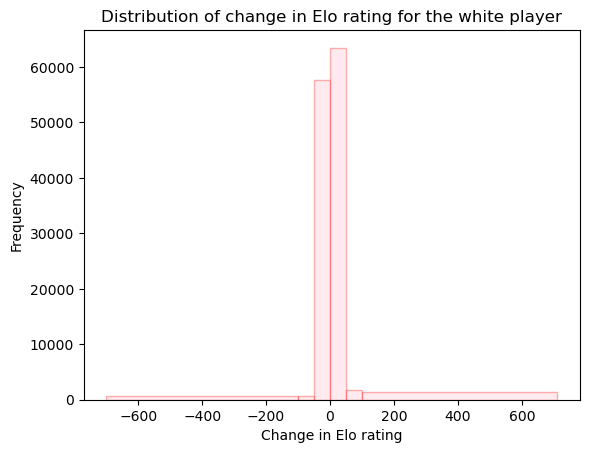

In [51]:
# Create a histogram
# we want to see all the data distributed between the minimum and maximum values
bin_category = [chess['WhiteRatingDiff'].min(),-100 , -50, 0, 50, 100, chess['WhiteRatingDiff'].max()]

plot.hist(chess['WhiteRatingDiff'], bins = bin_category, color = 'pink', edgecolor = 'red', alpha = 0.3)
plot.xlabel('Change in Elo rating')
plot.ylabel('Frequency')
plot.title('Distribution of change in Elo rating for the white player')
plot.show()

We will create a function to calculate z-scores. Functions are like blocks of reusable code. It makes code simpler.

To calculate z-scores: we have a formula: (Value - Mean) / standard deviation

In [52]:
def calculate_zscores(column):
    mean = chess[column].mean()
    std = chess[column].std()
    return (chess[column] - mean) / std

chess['zscore_WhiteRatingDiff'] = calculate_zscores('WhiteRatingDiff')
chess['zscore_BlackRatingDiff'] = calculate_zscores('BlackRatingDiff')

In [53]:
print(chess['zscore_WhiteRatingDiff'])

0        -0.252394
1         0.192229
2        -0.222752
3        -0.222752
4         0.103304
            ...   
130916   -0.222752
130917   -0.074545
130918   -0.222752
130919    0.103304
130921   -0.252394
Name: zscore_WhiteRatingDiff, Length: 125682, dtype: float64


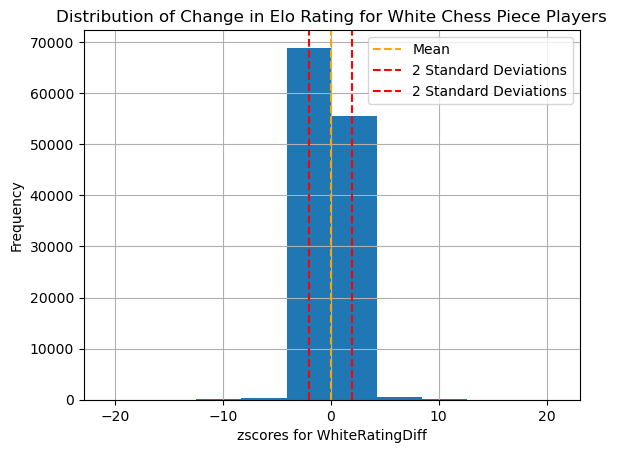

In [54]:
plot.hist(chess['zscore_WhiteRatingDiff'])
plot.axvline(chess['zscore_WhiteRatingDiff'].mean(), color='orange', linestyle='dashed', label='Mean')
plot.axvline(chess['zscore_WhiteRatingDiff'].mean() + 2*chess['zscore_WhiteRatingDiff'].std(), color='red', linestyle='--', label='2 Standard Deviations')
plot.axvline(chess['zscore_WhiteRatingDiff'].mean() - 2*chess['zscore_WhiteRatingDiff'].std(), color='red', linestyle='--', label='2 Standard Deviations')
plot.xlabel('zscores for WhiteRatingDiff')
plot.ylabel('Frequency')
plot.title('Distribution of Change in Elo Rating for White Chess Piece Players')
plot.legend()
plot.grid(True)
plot.show()

In [55]:
print(chess['zscore_BlackRatingDiff'])

0         0.176516
1        -0.294993
2         0.109157
3         0.109157
4        -0.261314
            ...   
130916    0.142837
130917   -0.025559
130918    6.407172
130919   -0.261314
130921    0.142837
Name: zscore_BlackRatingDiff, Length: 125682, dtype: float64


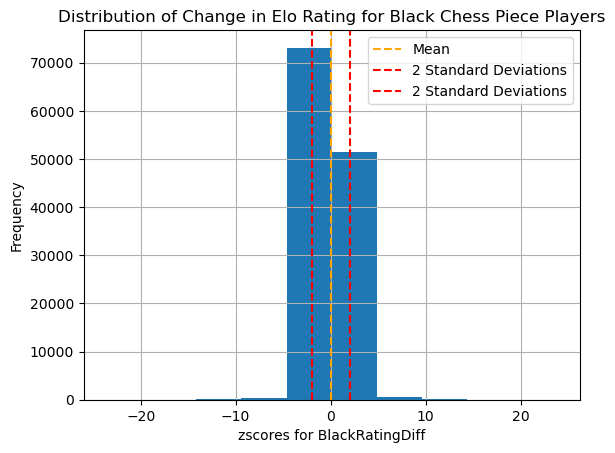

In [56]:
plot.hist(chess['zscore_BlackRatingDiff'])
plot.axvline(chess['zscore_BlackRatingDiff'].mean(), color='orange', linestyle='dashed', label='Mean')
plot.axvline(chess['zscore_BlackRatingDiff'].mean() + 2*chess['zscore_BlackRatingDiff'].std(), color='red', linestyle='--', label='2 Standard Deviations')
plot.axvline(chess['zscore_BlackRatingDiff'].mean() - 2*chess['zscore_BlackRatingDiff'].std(), color='red', linestyle='--', label='2 Standard Deviations')
plot.xlabel('zscores for BlackRatingDiff')
plot.ylabel('Frequency')
plot.title('Distribution of Change in Elo Rating for Black Chess Piece Players')
plot.legend()
plot.grid(True)
plot.show()

Let's work out chebyshev theorem.This basically shows how many standard deviations the data is in of the mean - 1, 2, 3 etc

"s" represents number of standard deviations

In [57]:
def chebyshev_theorem(chess_data, s):
  mean = chess_data.mean()
  std = chess_data.std()
  return 1 - 1 / (s**2)

In [58]:
# Let's see if the data is within 3 standard deviations
s = 3
proportion_within_s_sd = chebyshev_theorem(chess['WhiteRatingDiff'], s)
print(f"Minimum proportion of data within {s} standard deviations of the mean:", round(proportion_within_s_sd, 2))


Minimum proportion of data within 3 standard deviations of the mean: 0.89


In [59]:
# Let's do the same for the next column
s = 3
proportion_within_s_sd = chebyshev_theorem(chess['BlackRatingDiff'], s)
print(f"Minimum proportion of data within {s} standard deviations of the mean:", round(proportion_within_s_sd, 2))


Minimum proportion of data within 3 standard deviations of the mean: 0.89


Now lets do a bell curve to see the distribution of the Elo ratings for both white and black chess piece players.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


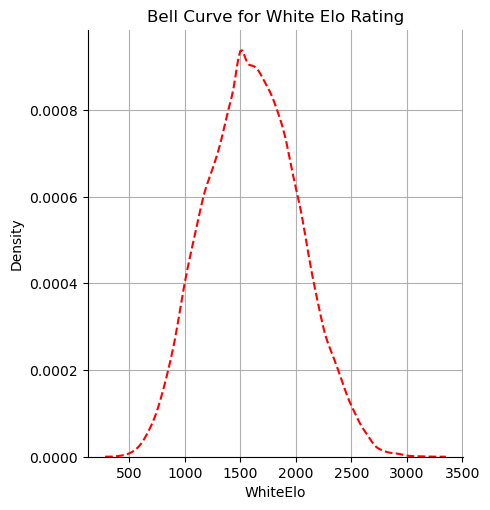

In [60]:
# Create the plot
# kernel density estimation (KDE) just means - we want the graph to resemble a bell curve.
sb.displot(chess['WhiteElo'], kind="kde", color='red', linestyle='--', label='Normal Distribution')
plot.title('Bell Curve for White Elo Rating')
plot.grid(True)
plot.show()

Let's do the same for the other column

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


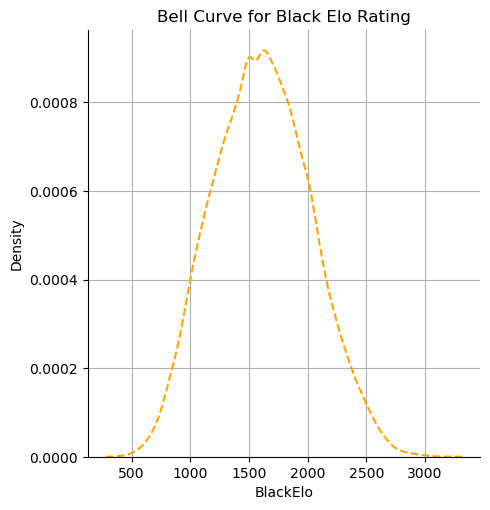

In [61]:
# Create the plot
# kernel density estimation (KDE) just means - we want the graph to resemble a bell curve.
sb.displot(chess['BlackElo'], kind="kde",color='orange', linestyle='--', label='Normal Distribution')
plot.title('Bell Curve for Black Elo Rating')
plot.grid(True)
plot.show()

Lastly, what are the outliers based on the z-scores?

We just need the min and max value of the z-scores and truncate to 2 decimal places.

In [62]:
print("The most extreme z-scores for black chess piece players are", round(chess['zscore_BlackRatingDiff'].min(), 2), "and", round(chess['zscore_BlackRatingDiff'].max(), 2))

The most extreme z-scores for black chess piece players are -23.63 and 23.85


We apply same concept as above for the other column.

In [63]:
print("The most extreme z-scores for white chess piece players are", round(chess['zscore_WhiteRatingDiff'].min(), 2), "and", round(chess['zscore_WhiteRatingDiff'].max(), 2))

The most extreme z-scores for white chess piece players are -20.82 and 20.97


### <u> Exploratory Data Analysis </u>
This refers to the 5 number summary and visualizing it in a boxplot.

In [64]:
minimum = chess['WhiteRatingDiff'].min()
Q1 = chess['WhiteRatingDiff'].quantile(0.25)
Q2 = chess['WhiteRatingDiff'].quantile(0.5)
Q3 = chess['WhiteRatingDiff'].quantile(0.75)
maximum = chess['WhiteRatingDiff'].max()

five_num_summary = [["Minimum", minimum], ["Q1", Q1], ["Q2", Q2], ["Q3", Q3], ["Maximum", maximum]]
df_five_num_summary = pd.DataFrame(five_num_summary, columns=["Statistic", "Value"])

df_five_num_summary.head()

,Statistic,Value
0,Minimum,-700.0
1,Q1,-6.0
2,Q2,1.0
3,Q3,6.0
4,Maximum,710.0


Let's visualize this in a boxplot

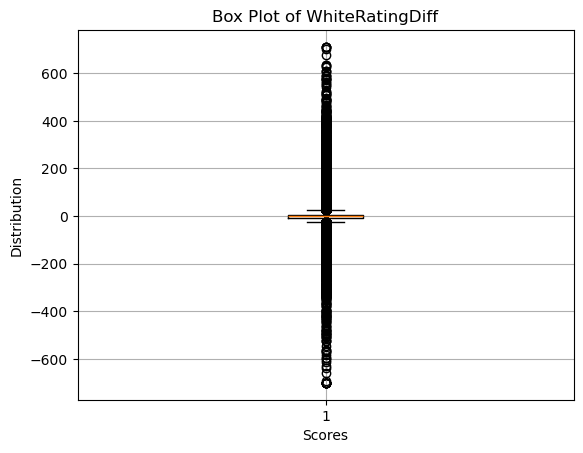

In [65]:
# Create a box plot
plot.boxplot(chess['WhiteRatingDiff'])
plot.xlabel('Scores')
plot.ylabel('Distribution')
plot.title('Box Plot of WhiteRatingDiff')
plot.grid(True)
plot.show()

Let's apply the same for another column

In [66]:
minimum = chess['BlackRatingDiff'].min()
Q1 = chess['BlackRatingDiff'].quantile(0.25)
Q2 = chess['BlackRatingDiff'].quantile(0.5)
Q3 = chess['BlackRatingDiff'].quantile(0.75)
maximum = chess['BlackRatingDiff'].max()

five_num_summary = [["Minimum", minimum], ["Q1", Q1], ["Q2", Q2], ["Q3", Q3], ["Maximum", maximum]]
df_five_num_summary = pd.DataFrame(five_num_summary, columns=["Statistic", "Value"])

df_five_num_summary.head()

,Statistic,Value
0,Minimum,-700.0
1,Q1,-6.0
2,Q2,-1.0
3,Q3,6.0
4,Maximum,710.0


Now for visualization

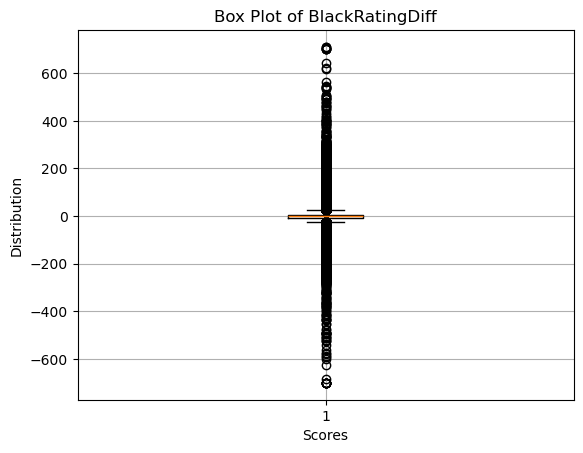

In [67]:
# Create a box plot
plot.boxplot(chess['BlackRatingDiff'])
plot.xlabel('Scores')
plot.ylabel('Distribution')
plot.title('Box Plot of BlackRatingDiff')
plot.grid(True)
plot.show()

### <u> Measures of Association </u>
This refers to covariance and correlation coefficient. This basically the relationship measure to identify relations between data and it's strength.

In [68]:
covariance = chess['WhiteElo'].cov(chess['WhiteRatingDiff'])
print(covariance)

-526.9203481484087


Let's visualize the relationship between White Chess Players Elo Rating and their Change in Elo Rating after the game.

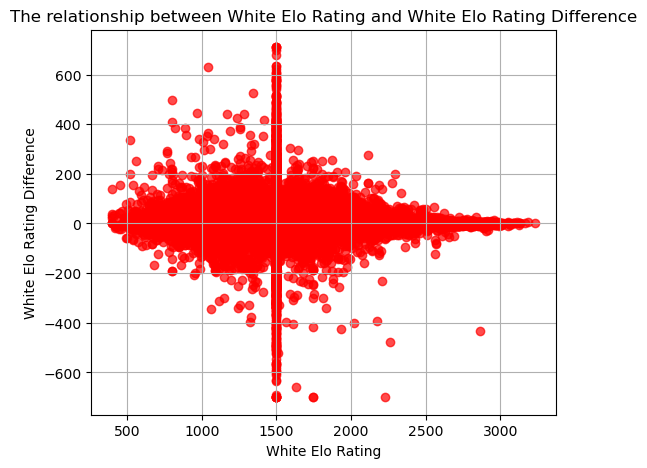

In [69]:
plot.figure(figsize=(6, 5))  # Adjust figure size for better visualization
plot.scatter(chess['WhiteElo'], chess['WhiteRatingDiff'], marker='o', color='red', alpha=0.7)  # Adjust marker, color, and transparency
plot.xlabel('White Elo Rating')
plot.ylabel('White Elo Rating Difference')
plot.title('The relationship between White Elo Rating and White Elo Rating Difference')
plot.grid(True)
plot.show()


What is the relationship between Elo Rating and total playtime on the platform?

In [70]:
covariance = chess['WhiteElo'].cov(chess['White_playTime_total'])
print(covariance)

435868484.85924864


Let's visualize it

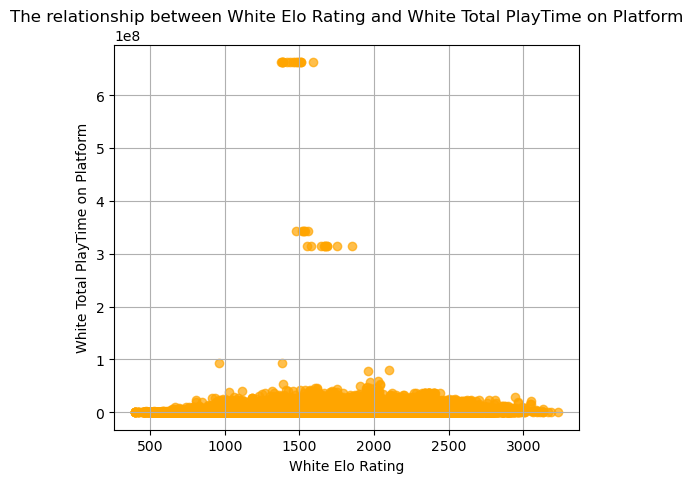

In [71]:
plot.figure(figsize=(6, 5))  # Adjust figure size for better visualization
plot.scatter(chess['WhiteElo'], chess['White_playTime_total'], marker='o', color='orange', alpha=0.7)  # Adjust marker, color, and transparency
plot.xlabel('White Elo Rating')
plot.ylabel('White Total PlayTime on Platform')
plot.title('The relationship between White Elo Rating and White Total PlayTime on Platform')
plot.grid(True)
plot.show()


Lets's apply the same process for Black Chess Piece Players

In [72]:
covariance = chess['BlackElo'].cov(chess['BlackRatingDiff'])
print(covariance)

-451.7595486556485


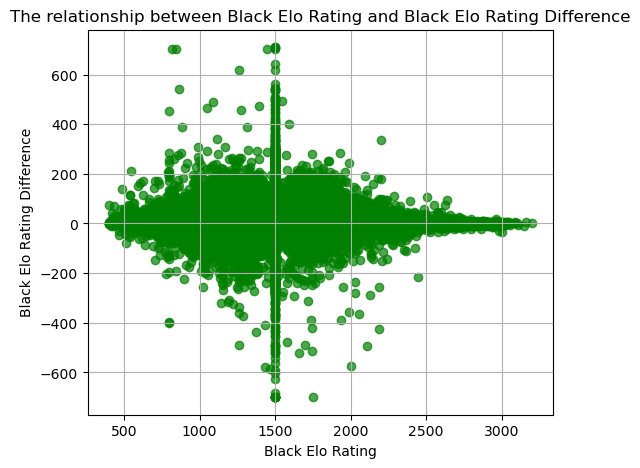

In [73]:
plot.figure(figsize=(6, 5))  # Adjust figure size for better visualization
plot.scatter(chess['BlackElo'], chess['BlackRatingDiff'], marker='o', color='green', alpha=0.7)  # Adjust marker, color, and transparency
plot.xlabel('Black Elo Rating')
plot.ylabel('Black Elo Rating Difference')
plot.title('The relationship between Black Elo Rating and Black Elo Rating Difference')
plot.grid(True)
plot.show()

In [74]:
covariance = chess['BlackElo'].cov(chess['Black_playTime_total'])
print(covariance)

442416503.9736444


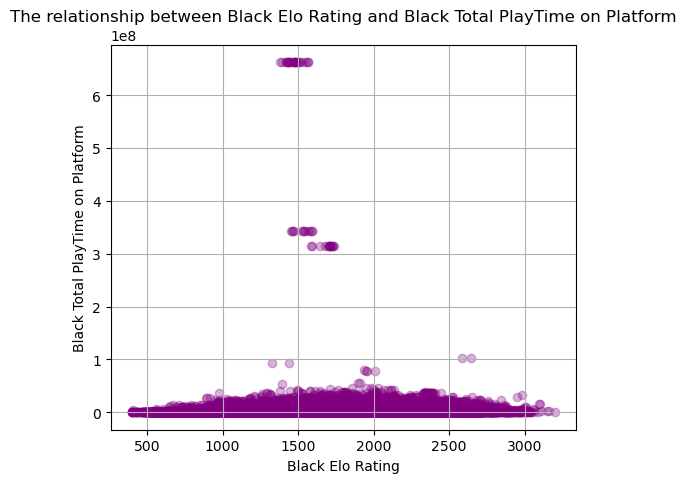

In [75]:
plot.figure(figsize=(6, 5))  # Adjust figure size for better visualization
plot.scatter(chess['BlackElo'], chess['Black_playTime_total'], marker='o', color='purple', alpha=0.3)  # Adjust marker, color, and transparency
plot.xlabel('Black Elo Rating')
plot.ylabel('Black Total PlayTime on Platform')
plot.title('The relationship between Black Elo Rating and Black Total PlayTime on Platform')
plot.grid(True)
plot.show()


What are some other analysis we can do on the data?

What about Pattern recognition? How can we identify common opening sequences?

In [76]:
# Assuming 'Moves' column contains the opening sequence as a string
opening_sequences = chess['Opening']

In [77]:
# Convert all characters in the opening sequences to lowercase so we can count each occurance 
opening_sequences = opening_sequences.str.lower()

In [78]:
# Create a Counter object to track opening sequence frequencies
sequence_counts = Counter(opening_sequences)

# Get the most frequent opening sequences
most_frequent_sequences = sequence_counts.most_common(n=3)


In [79]:
print("1st:", most_frequent_sequences[0][0], "was used by", most_frequent_sequences[0][1], "players.")
print("2nd:", most_frequent_sequences[1][0], "was used by",  most_frequent_sequences[1][1], "players.")
print("3rd:", most_frequent_sequences[2][0], "was used by",  most_frequent_sequences[2][1], "players.")

1st: queen's pawn game: accelerated london system was used by 2687 players.
2nd: caro-kann defense was used by 2563 players.
3rd: queen's pawn game was used by 2476 players.


In [80]:
percentage_of_players_openings = (most_frequent_sequences[0][1] / 125682) * 100

print("The most common opening used by", round(percentage_of_players_openings, 2), "% of players is", most_frequent_sequences[0][0])

The most common opening used by 2.14 % of players is queen's pawn game: accelerated london system


Let's look at cross tabulation of different openings with events.
I will display the frequency of results across different categories of openings

In [83]:
crosstab_table = pd.crosstab(chess['Opening'], chess['Result'])
crosstab_table

Result,*,0-1,1-0,1/2-1/2
Opening,,,,
Alekhine Defense,0,130,138,3
Alekhine Defense: Balogh Variation,0,8,8,0
Alekhine Defense: Brooklyn Variation,0,11,23,0
Alekhine Defense: Exchange Variation,0,28,34,1
"Alekhine Defense: Exchange Variation, Voronezh Variation",0,0,2,0
...,...,...,...,...
Zukertort Opening: The Potato,0,3,2,0
Zukertort Opening: The Walrus,0,6,5,0
Zukertort Opening: Vos Gambit,0,12,18,0


# Summary Analysis

### Measures of Location
The chess platform data reveals that both white and black players have an average Elo rating around 1611, with white players showing a slight advantage in median ratings and game outcomes, likely due to the first-move benefit. While the average playtime is significantly higher for white players, the median and percentile distributions suggest similar levels of engagement and experience across both groups. The most common Elo rating is 1500, indicating a prevalence of beginner players, and the majority of games conclude normally, with white players more frequently emerging victorious.

### Measures of Variability
The variability in chess player data shows a broad range of Elo ratings, with both white and black players experiencing substantial changes post-game. The Interquartile Range suggests a consistent level of mid-range player engagement, while the variance points to a similar spread in skill levels across players. The Coefficient of Variation indicates that black players’ ratings are slightly more uniform compared to white players, reflecting a dynamic and diverse player base with varying degrees of consistency in their performance.

### Measures of Distribution
Chess player Elo ratings follow a normal distribution, with most players experiencing minor changes in rating after games. This stability is reflected in the bell-shaped curve where the majority of data points fall close to the average. The extreme z-scores suggest rare instances of significant rating gains or losses. While the data for white and black chess piece players show similar trends, they likely represent separate distributions, meaning a player's White Elo rating doesn't necessarily predict their Black Elo rating.

### Exploratory Data Analysis
The data suggests a positive correlation between a player’s white Elo rating and the change in their Elo rating after a game, with higher-rated players generally experiencing more favorable Elo point exchanges. Conversely, there’s no evident link between a player’s Elo rating and their total playtime, indicating that time spent on the platform doesn’t strongly correlate with chess skill. Additionally, while most players’ ratings remain stable post-game, some variability exists, particularly among lower-rated players, whereas higher-rated players tend to have more consistent ratings.

### Other Analysis
The Queen’s Pawn Game: Accelerated London System is both the most popular and most common opening, used by 2,687 players, representing 2.14% of the total.